In [1]:
import pandas as pd
import numpy as np
import Recommenders as Recommenders
import matplotlib.pyplot as plt


In [2]:
song_df_1 = pd.read_csv('triplets_file.csv')
song_df_1.head()

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [3]:
song_df_2 = pd.read_csv('song_data.csv')
song_df_2.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [4]:
song_df = pd.merge(song_df_1, song_df_2.drop_duplicates(['song_id']), on='song_id', how='left')
song_df.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [5]:
print(len(song_df_1), len(song_df_2))

1048575 1000000


In [6]:
# creating new feature combining title and artist name
song_df['song'] = song_df['title']+' - '+song_df['artist_name']
song_df.head()

,user_id,song_id,listen_count,title,release,artist_name,year,song
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0,The Cove - Jack Johnson
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,Entre Dos Aguas - Paco De Lucia
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007,Stronger - Kanye West
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005,Constellations - Jack Johnson
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly - Foo Fighters


In [7]:
song_df = song_df.head(10000)
# cummulative sum of listen count of the songs
song_grouped = song_df.groupby(['song']).agg({'listen_count':'count'}).reset_index()
song_grouped.head()

,song,listen_count
0,#40 - DAVE MATTHEWS BAND,1
1,& Down - Boys Noize,4
2,'97 Bonnie & Clyde - Eminem,2
3,'Round Midnight - Miles Davis,3
4,'Till I Collapse - Eminem / Nate Dogg,6


In [8]:
# creating new feature combining title and artist name
song_df['song'] = song_df['title']+' - '+song_df['artist_name']
song_df.head()

,user_id,song_id,listen_count,title,release,artist_name,year,song
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0,The Cove - Jack Johnson
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,Entre Dos Aguas - Paco De Lucia
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007,Stronger - Kanye West
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005,Constellations - Jack Johnson
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly - Foo Fighters


In [9]:
grouped_sum = song_grouped['listen_count'].sum()
song_grouped['percentage'] = (song_grouped['listen_count'] / grouped_sum ) * 100
song_grouped.sort_values(['listen_count', 'song'], ascending=[0,1])

,song,listen_count,percentage
3660,Sehr kosmisch - Harmonia,45,0.45
4678,Undo - Björk,32,0.32
5105,You're The One - Dwight Yoakam,32,0.32
1071,Dog Days Are Over (Radio Edit) - Florence + Th...,28,0.28
3655,Secrets - OneRepublic,28,0.28
...,...,...,...
5139,high fives - Four Tet,1,0.01
5140,in white rooms - Booka Shade,1,0.01
5143,paranoid android - Christopher O'Riley,1,0.01
5149,¿Lo Ves? [Piano Y Voz] - Alejandro Sanz,1,0.01


In [10]:
pr = Recommenders.popularity_recommender_py()
pr.create(song_df, 'user_id', 'song')
# display the top 10 popular songs
pr.recommend(song_df['user_id'][6])

,user_id,song,score,Rank
3660,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Sehr kosmisch - Harmonia,45,1.0
4678,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Undo - Björk,32,2.0
5105,b80344d063b5ccb3212f76538f3d9e43d87dca9e,You're The One - Dwight Yoakam,32,3.0
1071,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Dog Days Are Over (Radio Edit) - Florence + Th...,28,4.0
3655,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Secrets - OneRepublic,28,5.0
4379,b80344d063b5ccb3212f76538f3d9e43d87dca9e,The Scientist - Coldplay,27,6.0
4712,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Use Somebody - Kings Of Leon,27,7.0
3476,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Revelry - Kings Of Leon,26,8.0
1387,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Fireflies - Charttraxx Karaoke,24,9.0
1862,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Horn Concerto No. 4 in E flat K495: II. Romanc...,23,10.0


In [11]:
ir = Recommenders.item_similarity_recommender_py()
ir.create(song_df, 'user_id', 'song')
user_items = ir.get_user_items(song_df['user_id'][6])
# display user songs history
for user_item in user_items:
    print(user_item)

The Cove - Jack Johnson
Entre Dos Aguas - Paco De Lucia
Stronger - Kanye West
Constellations - Jack Johnson
Learn To Fly - Foo Fighters
Apuesta Por El Rock 'N' Roll - Héroes del Silencio
Paper Gangsta - Lady GaGa
Stacked Actors - Foo Fighters
Sehr kosmisch - Harmonia
Heaven's gonna burn your eyes - Thievery Corporation feat. Emiliana Torrini
Let It Be Sung - Jack Johnson / Matt Costa / Zach Gill / Dan Lebowitz / Steve Adams
I'll Be Missing You (Featuring Faith Evans & 112)(Album Version) - Puff Daddy
Love Shack - The B-52's
Clarity - John Mayer
I?'m A Steady Rollin? Man - Robert Johnson
The Old Saloon - The Lonely Island
Behind The Sea [Live In Chicago] - Panic At The Disco
Champion - Kanye West
Breakout - Foo Fighters
Ragged Wood - Fleet Foxes
Mykonos - Fleet Foxes
Country Road - Jack Johnson / Paula Fuga
Oh No - Andrew Bird
Love Song For No One - John Mayer
Jewels And Gold - Angus & Julia Stone
Warning - Incubus
83 - John Mayer
Neon - John Mayer
The Middle - Jimmy Eat World
High and 

In [12]:
ir.recommend(song_df['user_id'][5])

No. of unique songs for the user: 45
no. of unique songs in the training set: 5151
Non zero values in cooccurence_matrix :6844


,user_id,song,score,rank
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Oliver James - Fleet Foxes,0.043076,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Quiet Houses - Fleet Foxes,0.043076,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Your Protector - Fleet Foxes,0.043076,3
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Tiger Mountain Peasant Song - Fleet Foxes,0.043076,4
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Sun It Rises - Fleet Foxes,0.043076,5
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,The End - Pearl Jam,0.037531,6
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,St. Elsewhere - Dave Grusin,0.037531,7
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Misled - Céline Dion,0.037531,8
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Oil And Water - Incubus,0.037531,9
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Meadowlarks - Fleet Foxes,0.037531,10


In [13]:
ir.get_similar_items(['Oliver James - Fleet Foxes', 'The End - Pearl Jam'])

no. of unique songs in the training set: 5151
Non zero values in cooccurence_matrix :75


,user_id,song,score,rank
0,,Quiet Houses - Fleet Foxes,0.75,1
1,,St. Elsewhere - Dave Grusin,0.75,2
2,,Misled - Céline Dion,0.75,3
3,,Your Protector - Fleet Foxes,0.75,4
4,,Oil And Water - Incubus,0.75,5
5,,Tiger Mountain Peasant Song - Fleet Foxes,0.75,6
6,,Meadowlarks - Fleet Foxes,0.75,7
7,,Sun It Rises - Fleet Foxes,0.75,8
8,,Id Die Without You - P.M. Dawn,0.75,9
9,,Meet Virginia - Train,0.75,10


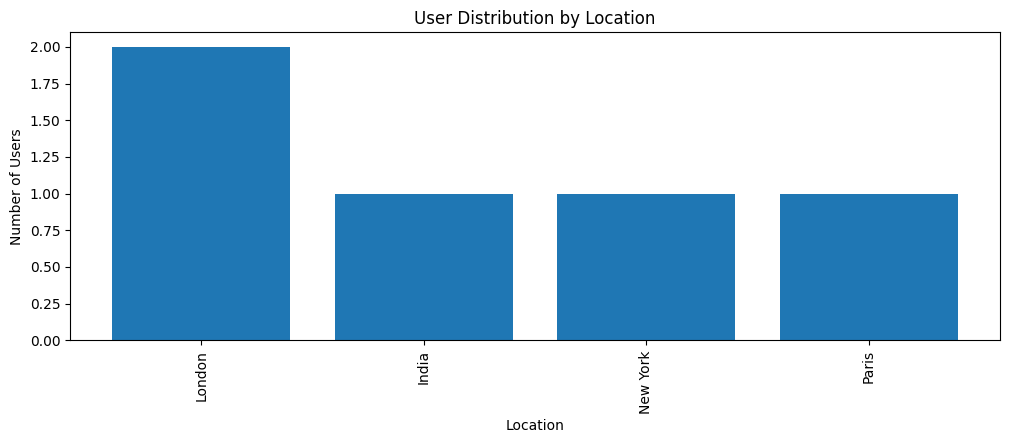

In [14]:
data = {
    'user_id': [1, 2, 3, 4, 5],
    'location': ['New York', 'London', 'Paris', 'India', 'London']
}

# Create DataFrame
df = pd.DataFrame(data)
location_counts = df.groupby('location')['user_id'].count().reset_index()

# Sort the locations based on the count in descending order
location_counts = location_counts.sort_values('user_id', ascending=False)

# Plotting the bar plot
plt.figure(figsize=(12, 4))
plt.bar(location_counts['location'], location_counts['user_id'])
plt.xlabel('Location')
plt.ylabel('Number of Users')
plt.title('User Distribution by Location')
plt.xticks(rotation=90)
plt.show()

In [15]:
import pandas as pd

# Load the CSV data into a pandas DataFrame
df = pd.read_csv('user_location.csv')

# Define music recommendations based on locations
recommendations = {
    'New York': {
        'genres': ['Hip-hop', 'Jazz', 'Punk', 'Indie rock'],
        'artists': ['Jay-Z', 'Alicia Keys', 'Frank Sinatra', 'The Strokes']
    },
    'San Francisco': {
        'genres': ['Alternative rock', 'Folk', 'Electronic'],
        'artists': ['Grateful Dead', 'Fleet Foxes', 'Tycho', 'Third Eye Blind']
    },
    'Los Angeles': {
        'genres': ['Pop', 'R&B'],
        'artists': ['Kendrick Lamar', 'Taylor Swift', 'Bruno Mars', 'Beyoncé']
    },
    # Add recommendations for other locations as per your preference
}

# Iterate over the DataFrame and recommend music for each user's location
for index, row in df.iterrows():
    user_id = row['user_id']
    location = row['location']
    
    if location in recommendations:
        genre_recommendation = recommendations[location]['genres']
        artist_recommendation = recommendations[location]['artists']
        
        print(f"Music recommendations for {user_id} in {location}:")
        print("Recommended Genres:", ', '.join(genre_recommendation))
        print("Recommended Artists:", ', '.join(artist_recommendation))
        print()


Music recommendations for user1 in New York:
Recommended Genres: Hip-hop, Jazz, Punk, Indie rock
Recommended Artists: Jay-Z, Alicia Keys, Frank Sinatra, The Strokes

Music recommendations for user2 in San Francisco:
Recommended Genres: Alternative rock, Folk, Electronic
Recommended Artists: Grateful Dead, Fleet Foxes, Tycho, Third Eye Blind

Music recommendations for user3 in Los Angeles:
Recommended Genres: Pop, R&B
Recommended Artists: Kendrick Lamar, Taylor Swift, Bruno Mars, Beyoncé



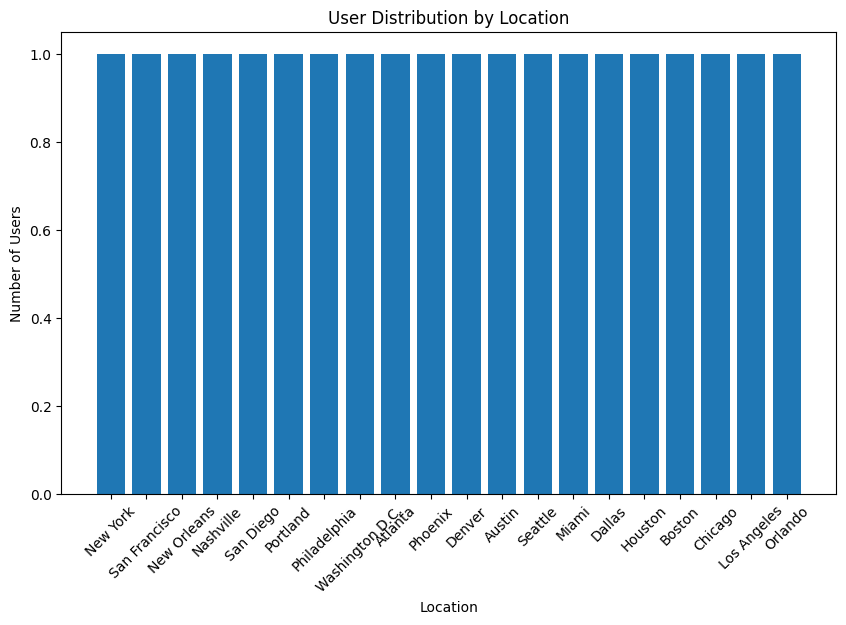

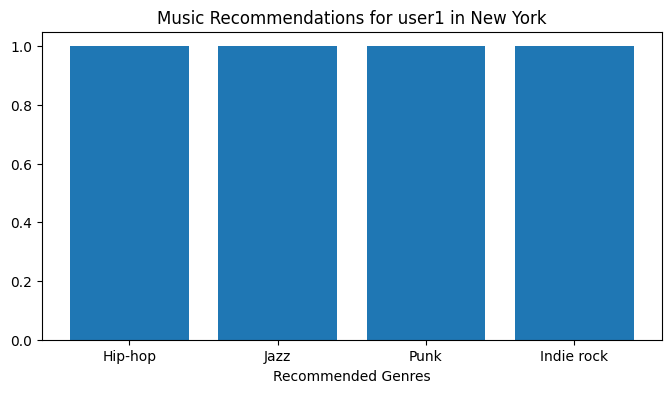

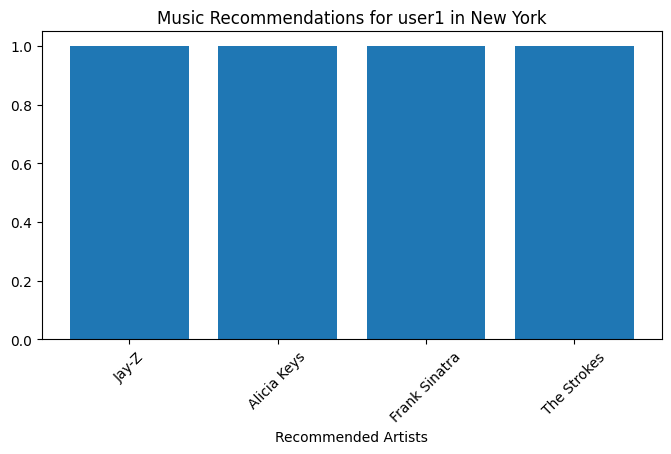

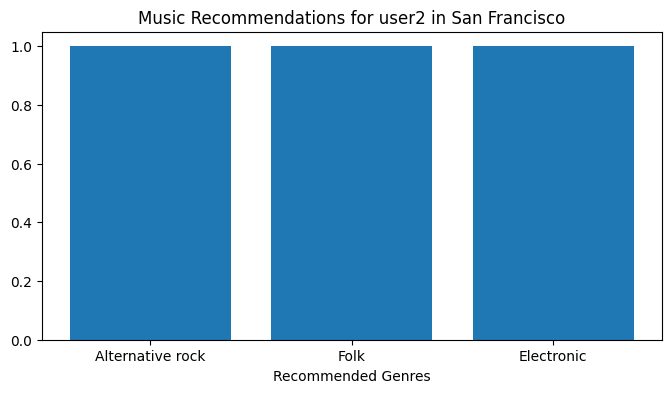

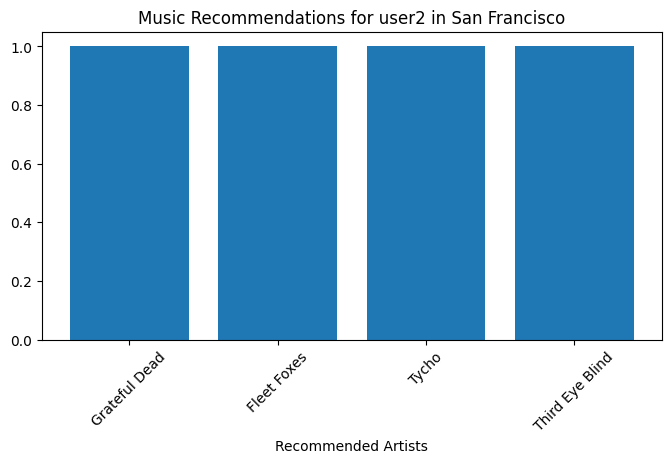

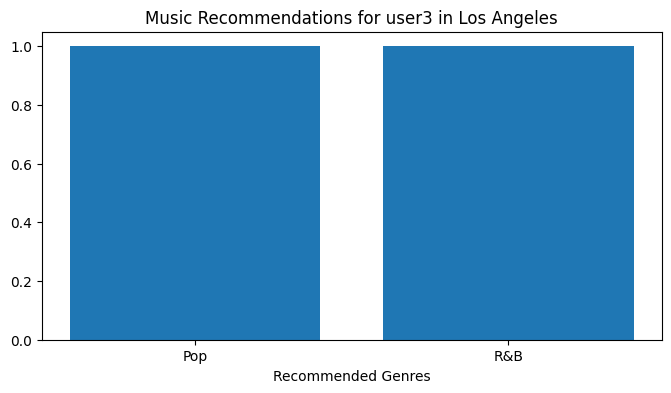

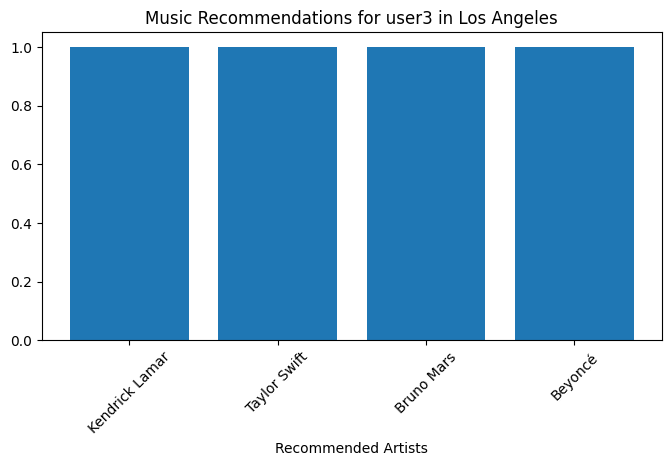

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a pandas DataFrame
df = pd.read_csv('user_location.csv')

# Define music recommendations based on locations
recommendations = {
    'New York': {
        'genres': ['Hip-hop', 'Jazz', 'Punk', 'Indie rock'],
        'artists': ['Jay-Z', 'Alicia Keys', 'Frank Sinatra', 'The Strokes']
    },
    'San Francisco': {
        'genres': ['Alternative rock', 'Folk', 'Electronic'],
        'artists': ['Grateful Dead', 'Fleet Foxes', 'Tycho', 'Third Eye Blind']
    },
    'Los Angeles': {
        'genres': ['Pop', 'R&B'],
        'artists': ['Kendrick Lamar', 'Taylor Swift', 'Bruno Mars', 'Beyoncé']
    },
    # Add recommendations for other locations as per your preference
}

# Count the number of users in each location
location_counts = df['location'].value_counts()

# Create a bar graph to visualize the user distribution by location
plt.figure(figsize=(10, 6))
plt.bar(location_counts.index, location_counts.values)
plt.xlabel('Location')
plt.ylabel('Number of Users')
plt.title('User Distribution by Location')
plt.xticks(rotation=45)
plt.show()

# Iterate over the DataFrame and plot bar graphs for music recommendations
for index, row in df.iterrows():
    user_id = row['user_id']
    location = row['location']
    
    if location in recommendations:
        genre_recommendation = recommendations[location]['genres']
        artist_recommendation = recommendations[location]['artists']
        
        # Plot a bar graph for recommended genres
        plt.figure(figsize=(8, 4))
        plt.bar(range(len(genre_recommendation)), [1] * len(genre_recommendation), align='center')
        plt.xticks(range(len(genre_recommendation)), genre_recommendation)
        plt.xlabel('Recommended Genres')
        plt.title(f'Music Recommendations for {user_id} in {location}')
        plt.show()
        
        # Plot a bar graph for recommended artists
        plt.figure(figsize=(8, 4))
        plt.bar(range(len(artist_recommendation)), [1] * len(artist_recommendation), align='center')
        plt.xticks(range(len(artist_recommendation)), artist_recommendation, rotation=45)
        plt.xlabel('Recommended Artists')
        plt.title(f'Music Recommendations for {user_id} in {location}')
        plt.show()


with date and time 

In [17]:
import pandas as pd
from datetime import datetime

# Load the CSV data
data = pd.read_csv("user_location.csv")

# Get the current date and time
current_datetime = datetime.now()

# Extract the day of the week (0 = Monday, 6 = Sunday)
day_of_week = current_datetime.weekday()

# Define music recommendations based on location
recommendations = {
    "New York": ["Pop", "Hip Hop", "Jazz"],
    "San Francisco": ["Alternative", "Indie", "Electronic"],
    "Los Angeles": ["Pop", "Hip Hop", "R&B"],
    "Chicago": ["Blues", "Rock", "Jazz"],
    "Boston": ["Rock", "Indie", "Folk"],
    "Houston": ["Country", "Hip Hop", "Latin"],
    "Dallas": ["Country", "Rock", "Pop"],
    "Miami": ["Latin", "Reggaeton", "Pop"],
    "Seattle": ["Grunge", "Alternative", "Indie"],
    "Austin": ["Country", "Indie", "Rock"],
    "Denver": ["Rock", "Alternative", "Folk"],
    "Phoenix": ["Rock", "Pop", "Country"],
    "Atlanta": ["Hip Hop", "R&B", "Pop"],
    "Washington D.C.": ["Rock", "R&B", "Hip Hop"],
    "Philadelphia": ["Rock", "Pop", "R&B"],
    "Portland": ["Indie", "Alternative", "Rock"],
    "San Diego": ["Alternative", "Rock", "Pop"],
    "Nashville": ["Country", "Rock", "Indie"],
    "New Orleans": ["Jazz", "Blues", "Funk"],
    "Orlando": ["Pop", "Hip Hop", "Electronic"]
}

# Get the user IDs and their corresponding locations
user_locations = data.set_index('user_id')['location'].to_dict()

# Get the user's location based on their ID
user_id = "user1"  # Replace with the actual user ID
user_location = user_locations.get(user_id)

if user_location:
    # Get the music recommendations for the user's location
    location_recommendations = recommendations.get(user_location)

    if location_recommendations:
        # Get the current date and time in the format "YYYY-MM-DD HH:MM:SS"
        current_date_time = current_datetime.strftime("%Y-%m-%d %H:%M:%S")

        # Print the music recommendations for the user's location and current date/time
        print(f"Music recommendations for {user_location} ({current_date_time}):")
        for i, genre in enumerate(location_recommendations, start=1):
            print(f"{i}. {genre}")
    else:
        print("No music recommendations available for the user's location.")
else:
    print("User ID not found in the location data.")


Music recommendations for New York (2023-06-06 16:01:06):
1. Pop
2. Hip Hop
3. Jazz
